In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
data=load_breast_cancer()
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [ ]:
df_cancer=pd.DataFrame(data['data'],columns=data['feature_names'])
df_cancer['target']=data['target']
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['data'],data['target'],test_size=0.20,random_state=1)
print("X_train shape",x_train.shape)
print("X_test shape",x_test.shape)
print("Y_train shape",y_train.shape)
print("Y_test shape",y_test.shape)

X_train shape (455, 30)
X_test shape (114, 30)
Y_train shape (455,)
Y_test shape (114,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model.fit(x_train,y_train)
pv=model.predict(x_test)
print(pv)
from sklearn.metrics import accuracy_score,confusion_matrix
ac=accuracy_score(y_test,pv)
print(ac)
cm=confusion_matrix(y_test,pv)
print(cm)

[1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1]
0.9473684210526315
[[36  6]
 [ 0 72]]


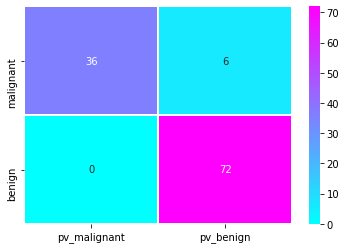

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap='cool',linewidths=0.5,yticklabels=['malignant', 'benign'],xticklabels=['pv_malignant', 'pv_benign'])

0     0.000000
1     0.012171
2     0.006351
3     0.000000
4     0.000000
5     0.016091
6     0.000000
7     0.017825
8     0.000000
9     0.013928
10    0.006351
11    0.000000
12    0.000000
13    0.015358
14    0.000000
15    0.009221
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.026332
21    0.057465
22    0.640598
23    0.000000
24    0.000000
25    0.000000
26    0.013957
27    0.164354
28    0.000000
29    0.000000
dtype: float64
RangeIndex(start=0, stop=30, step=1)


<BarContainer object of 30 artists>

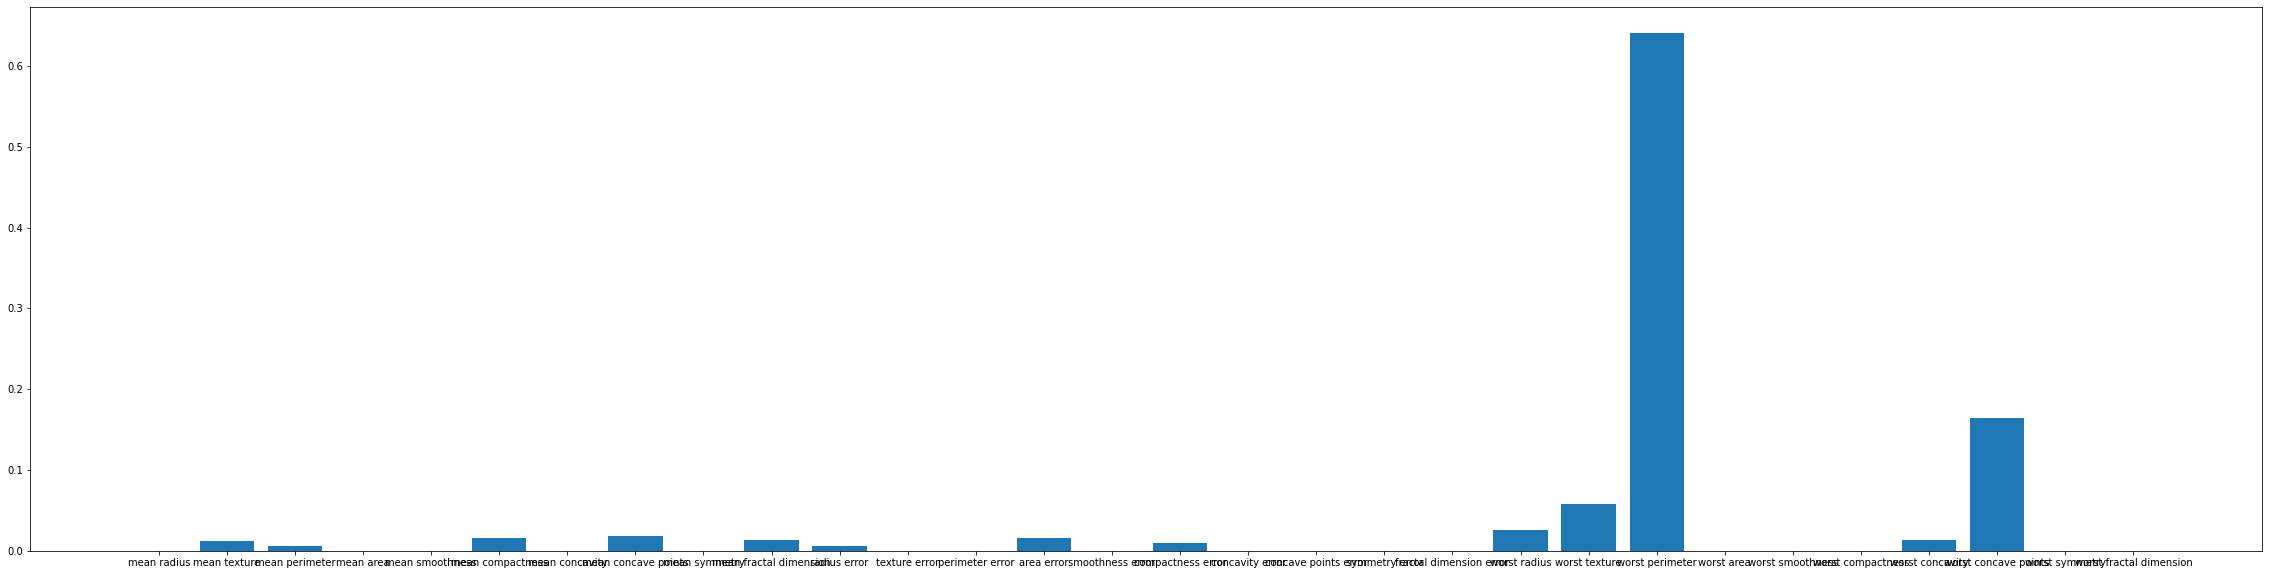

In [ ]:
fi=pd.Series(model.feature_importances_)
index=fi.index
print(fi)
print(index)
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
plt.bar(data['feature_names'],fi)

In [ ]:
print(data['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
df_cancer_final=pd.DataFrame({'worst texture':df_cancer['worst texture'],
                              'worst perimeter':df_cancer['worst perimeter'],
                              'worst concave points':df_cancer['worst concave points'],
                              'target':df_cancer['target']})
df_cancer_final.head(10)

,worst texture,worst perimeter,worst concave points,target
0,17.33,184.60,0.2654,0
1,23.41,158.80,0.1860,0
2,25.53,152.50,0.2430,0
3,26.50,98.87,0.2575,0
4,16.67,152.20,0.1625,0
5,23.75,103.40,0.1741,0
6,27.66,153.20,0.1932,0
7,28.14,110.60,0.1556,0
8,30.73,106.20,0.2060,0
9,40.68,97.65,0.2210,0


In [ ]:
x=df_cancer_final.iloc[:,0:3]
print(x)
y=df_cancer_final.iloc[:,3]
print(y)

     worst texture  worst perimeter  worst concave points
0            17.33           184.60                0.2654
1            23.41           158.80                0.1860
2            25.53           152.50                0.2430
3            26.50            98.87                0.2575
4            16.67           152.20                0.1625
..             ...              ...                   ...
564          26.40           166.10                0.2216
565          38.25           155.00                0.1628
566          34.12           126.70                0.1418
567          39.42           184.60                0.2650
568          30.37            59.16                0.0000

[569 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)
print("X_train shape",xtrain.shape)
print("X_test shape",xtest.shape)
print("Y_train shape",ytrain.shape)
print("Y_test shape",ytest.shape)

X_train shape (455, 3)
X_test shape (114, 3)
Y_train shape (455,)
Y_test shape (114,)


In [ ]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
pv=model.predict(xtest)
ac1=accuracy_score(ytest,pv)
print(ac1)

0.9385964912280702


<BarContainer object of 2 artists>

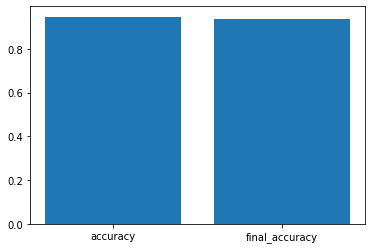

In [ ]:
acv=[ac,ac1]
aci=['accuracy','final_accuracy']
plt.bar(aci,acv)